# FFT Analysis Rotor Deviated with decreasing Speed

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
from pathlib import Path
folder='./Helper_scripts/'

importLibs=1
for path in Path(folder).rglob('*.py'):
    print(path.name)
    exec(open(path).read())

parseCC.py
GetFrequencyFromZCfile.py
VariablesExperiment.py
importLibs0.py
FFT.py
DisplayAndCut.py


In [3]:
VariablesExperiment(20210527)

In [4]:
#characteristische Frequenzen
fc=[31,150,220]
nf(f=fc[0],ret='n_rpm')/60

f_el_31und 2p=12.0ergibt n=155.0 rpm


2.5833333333333335

# Detect time intervals with equal average frequency 

In [5]:
scan_oscillogram=False

In [6]:
t_start=0.0
t_end=1.2
delta_t=0.002
if(scan_oscillogram):
    scope_fT=pd.DataFrame(columns=['index_scope_dat','ti','tf','f_mag_max','m_fmax'])
    for f in fc:
        name='m_f'+str(f)
        scope_fT[name]=None
    counter=0
    for index, row in scope_dat.loc[:].iterrows():
        for ti in np.arange(t_start,t_end,delta_t):
            scope_fT.loc[counter,'index_scope_dat']=index
            scope_fT.loc[counter,'ti']=ti
            scope_fT.loc[counter,'tf']=ti+1.0
            counter+=1


In [7]:
scope_dat

,Unnamed: 0,Index1,Date,Description0,Part,Description1,SerialFile,ScopeFile,Symbol,CalcByPy,2Tex,Value,Unit,Unnamed: 13
0,78,79,20210527,Aufnahme,scope,"36,37",../measurement_data/20210527/ZC/Lines_20210527...,../measurement_data/20210527/scope/scope_37_1.csv,parallel,NaN,NaN,29.5,Hz,NaN
1,79,80,20210527,Aufnahme,scope,38,../measurement_data/20210527/ZC/Lines_20210527...,../measurement_data/20210527/scope/scope_38_1.csv,parallel,NaN,NaN,29.5,Hz,NaN
2,80,81,20210527,Aufnahme,scope,39,../measurement_data/20210527/ZC/Lines_20210527...,../measurement_data/20210527/scope/scope_39_1.csv,parallel,NaN,NaN,29.5,Hz,NaN
3,81,82,20210527,Aufnahme,scope,40,../measurement_data/20210527/ZC/Lines_20210527...,../measurement_data/20210527/scope/scope_40_1.csv,parallel,NaN,NaN,29.5,Hz,NaN
4,82,83,20210527,Aufnahme,scope,41,../measurement_data/20210527/ZC/Lines_20210527...,../measurement_data/20210527/scope/scope_41_1.csv,parallel,NaN,NaN,29.5,Hz,NaN
5,85,86,20210527,Aufnahme,scope,"42,43",../measurement_data/20210527/ZC/Lines_20210527...,../measurement_data/20210527/scope/scope_42_1.csv,Rotor_Deviated,mit Auslauf,NaN,28.5,Hz,NaN
6,86,87,20210527,Aufnahme,scope,44,../measurement_data/20210527/ZC/Lines_20210527...,../measurement_data/20210527/scope/scope_44_1.csv,Rotor_Deviated,NaN,NaN,27.9,Hz,NaN
7,87,88,20210527,Aufnahme,scope,45,../measurement_data/20210527/ZC/Lines_20210527...,../measurement_data/20210527/scope/scope_45_1.csv,Rotor_Deviated,NaN,NaN,28.5,Hz,NaN
8,88,89,20210527,Aufnahme,scope,46,../measurement_data/20210527/ZC/Lines_20210527...,../measurement_data/20210527/scope/scope_46_1.csv,Rotor_Deviated,NaN,NaN,28.4,Hz,NaN
9,89,90,20210527,Aufnahme,scope,47,../measurement_data/20210527/ZC/Lines_20210527...,../measurement_data/20210527/scope/scope_47_1.csv,Rotor_Deviated,mit Auslauf,NaN,28.4,Hz,NaN


In [8]:
filename='scope_fT'+'_tstart'+str(t_start)+'_tend'+str(t_end)+'_deltat'+str(delta_t)
filename=filename.replace('.','K')
print(filename)
#dauert 5min
if(scan_oscillogram):
    scope_dat['index_copy']=scope_dat.index
    for index, row in scope_fT.iterrows():
        print(row['index_scope_dat'])
        file=scope_dat.loc[:,'ScopeFile'][row['index_scope_dat']]
        print(file)
        xf,yf, delta_f, totalN=FFT_ASCIIscope_mov2(file,zeroNrel=4,ti=row['ti'],tf=row['tf']) #Zero Padding to achieve delta_f=0.2
        for f in fc:
            name='m_f'+str(f)
            scope_fT.loc[index,name]=yf[np.where((xf>=f-0.1)&(xf<=f+0.1))][0]
        scope_fT.loc[index,'f_mag_max']=xf[np.where(yf.max()==yf)][0]
        scope_fT.loc[index,'m_fmax']=yf.max()
    scope_fT.to_pickle(filename+'.pkl')
else:
    scope_fT=pd.read_pickle(filename+'.pkl')

scope_fT_tstart0K0_tend1K2_deltat0K002


In [9]:
# analyse scope_fT to get right time
for f in fc:
    name='ti_f'+str(f)+'_1sek'
    scope_dat[name]=None

if(scan_oscillogram):
    for index, row in scope_dat.iterrows():
        for f in fc:
            name1='ti_f'+str(f)+'_1sek'
            name2='m_f'+str(f)
            max1=scope_fT.loc[scope_fT['index_scope_dat']==index,name2].max()
            scope_dat.loc[index,name1]=scope_fT.loc[scope_fT[name2]==max1,'ti'].min()


    
    

In [10]:
#fc[0]=30
f=fc[0]
name1='ti_f'+str(f)+'_nearest_1sek'
scope_dat[name1]=None
name2='f'+str(f)+'_nearest_1sek'
scope_dat[name2]=None
name3='m_f'+str(f)+'_nearest_1sek'
scope_dat[name3]=None

for index, row in scope_dat.loc[:].iterrows():
    scope_fT1=scope_fT.loc[scope_fT['index_scope_dat']==index,:]
    #idx=scope_fT1.iloc[(scope_fT1['f_mag_max']-f).abs().argsort()[:1]].index[0]
    idx=scope_fT1.iloc[(scope_fT1['f_mag_max']-f).abs().argsort()[:1]].index[0]
    fmax=scope_fT.iloc[idx]['f_mag_max']
    mfmax=scope_fT1.loc[scope_fT['f_mag_max']==fmax,'m_fmax'].max()
    idx1=scope_fT1.loc[scope_fT['m_fmax']==mfmax,:].index[0]
    scope_dat.loc[index,name1]=scope_fT.iloc[idx1]['ti']
    scope_dat.loc[index,name2]=scope_fT.iloc[idx1]['f_mag_max']
    scope_dat.loc[index,name3]=mfmax

In [11]:
scope_dat.to_pickle(filename+'_scope_dat'+'.pkl')

AxesSubplot(0.125,0.536818;0.133621x0.343182)
AxesSubplot(0.285345,0.536818;0.133621x0.343182)
AxesSubplot(0.44569,0.536818;0.133621x0.343182)
AxesSubplot(0.606034,0.536818;0.133621x0.343182)
AxesSubplot(0.766379,0.536818;0.133621x0.343182)
AxesSubplot(0.125,0.125;0.133621x0.343182)
AxesSubplot(0.285345,0.125;0.133621x0.343182)
AxesSubplot(0.44569,0.125;0.133621x0.343182)
AxesSubplot(0.606034,0.125;0.133621x0.343182)
AxesSubplot(0.766379,0.125;0.133621x0.343182)


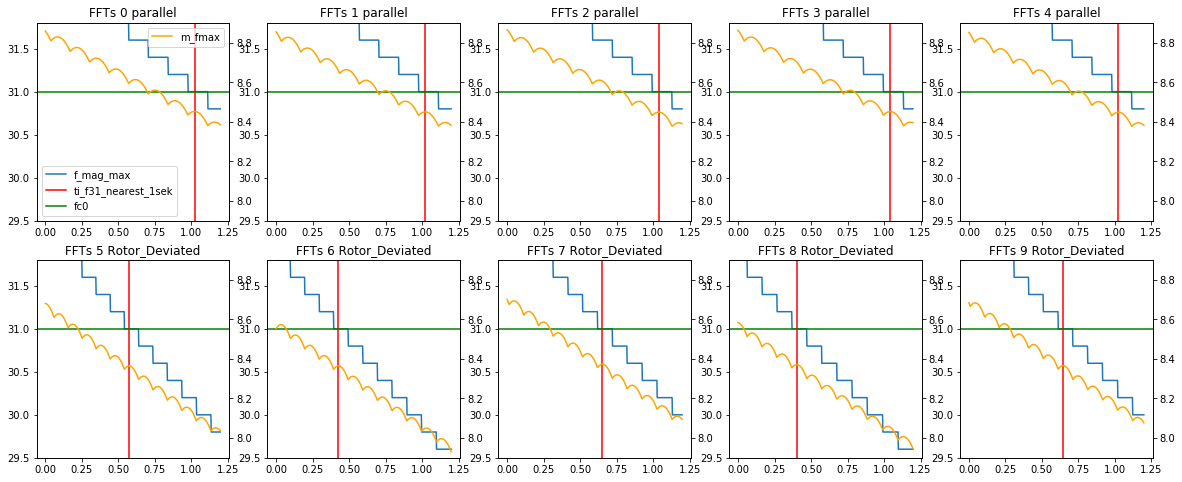

In [12]:
fig, ax = plt.subplots(2,5,figsize = (20,8))
for index, row in scope_dat.loc[:].iterrows():
    index_scope_dat=index
    filter=(scope_fT['index_scope_dat']==index_scope_dat)
    if(row['Symbol']=='parallel'):
        ax1=ax[0,index]
    else:
        ax1=ax[1,index-5]
    print(ax1)
    ax1.set_ylim(29.5,31.8)
    ax2 = ax1.twinx()
    m_mean=scope_fT['m_fmax'].mean()
    ax2.set_ylim(7.9,8.9)
    ti=scope_fT.loc[filter,'ti']
    ax1.plot(ti,scope_fT.loc[filter,'f_mag_max'],label='f_mag_max')
    ax2.plot(ti,scope_fT.loc[filter,'m_fmax'],c='orange',label='m_fmax')
    ax1.axvline(x=(scope_dat.loc[index_scope_dat,name1]),c='red',label=name1)
    ax1.axhline(y=fc[0],c='green',label='fc0')
    if(index==0):
        ax1.legend(loc=3)
        ax2.legend(loc=1)
    plt.title('FFTs '+str(index_scope_dat)+' '+row['Symbol'])
plt.show()

## Make FFT and group into bins

In [13]:
bin_width=10
#ti_col=name='ti_f'+str(fc[0])+'_1sek'
ti_col='ti_f'+str(fc[0])+'_nearest_1sek'
print(ti_col)
for index, row in scope_dat.iterrows():
    xf,yf, delta_f, totalN=FFT_ASCIIscope_mov2(row['ScopeFile'],zeroNrel=4,ti=row[ti_col],tf=(row[ti_col]+1)) #Zero Padding to achieve delta_f=0.2
    if(index==0):
        spek=pd.DataFrame(xf,columns=['freq'])
    spek[index]=yf
    #make bins & store
    bins=xf//bin_width
    df_b0=pd.DataFrame(bins,columns=['bins'])
    df_b0['yf']=pd.DataFrame(yf)
    if(index==0):
        df_b1=df_b0.groupby(['bins']).sum()
        df_b1.rename(columns = {"yf": index}, inplace=True)
    else:
        df_b1[index]=df_b0.groupby(['bins']).sum()
df_b1['bins']=df_b1.index
df_b1['freq']=df_b1['bins']*bin_width
spek_bins=df_b1.copy()

ti_f31_nearest_1sek
100000 500000 0.2000008000032 (250000,) (250000,)
100000 500000 0.2000008000032 (250000,) (250000,)
100000 500000 0.2000008000032 (250000,) (250000,)
100000 500000 0.2000008000032 (250000,) (250000,)
100000 500000 0.2000008000032 (250000,) (250000,)
100000 500000 0.2000008000032 (250000,) (250000,)
100000 500000 0.2000008000032 (250000,) (250000,)
100000 500000 0.2000008000032 (250000,) (250000,)
100000 500000 0.2000008000032 (250000,) (250000,)
100000 500000 0.2000008000032 (250000,) (250000,)


## Visualisation of the results

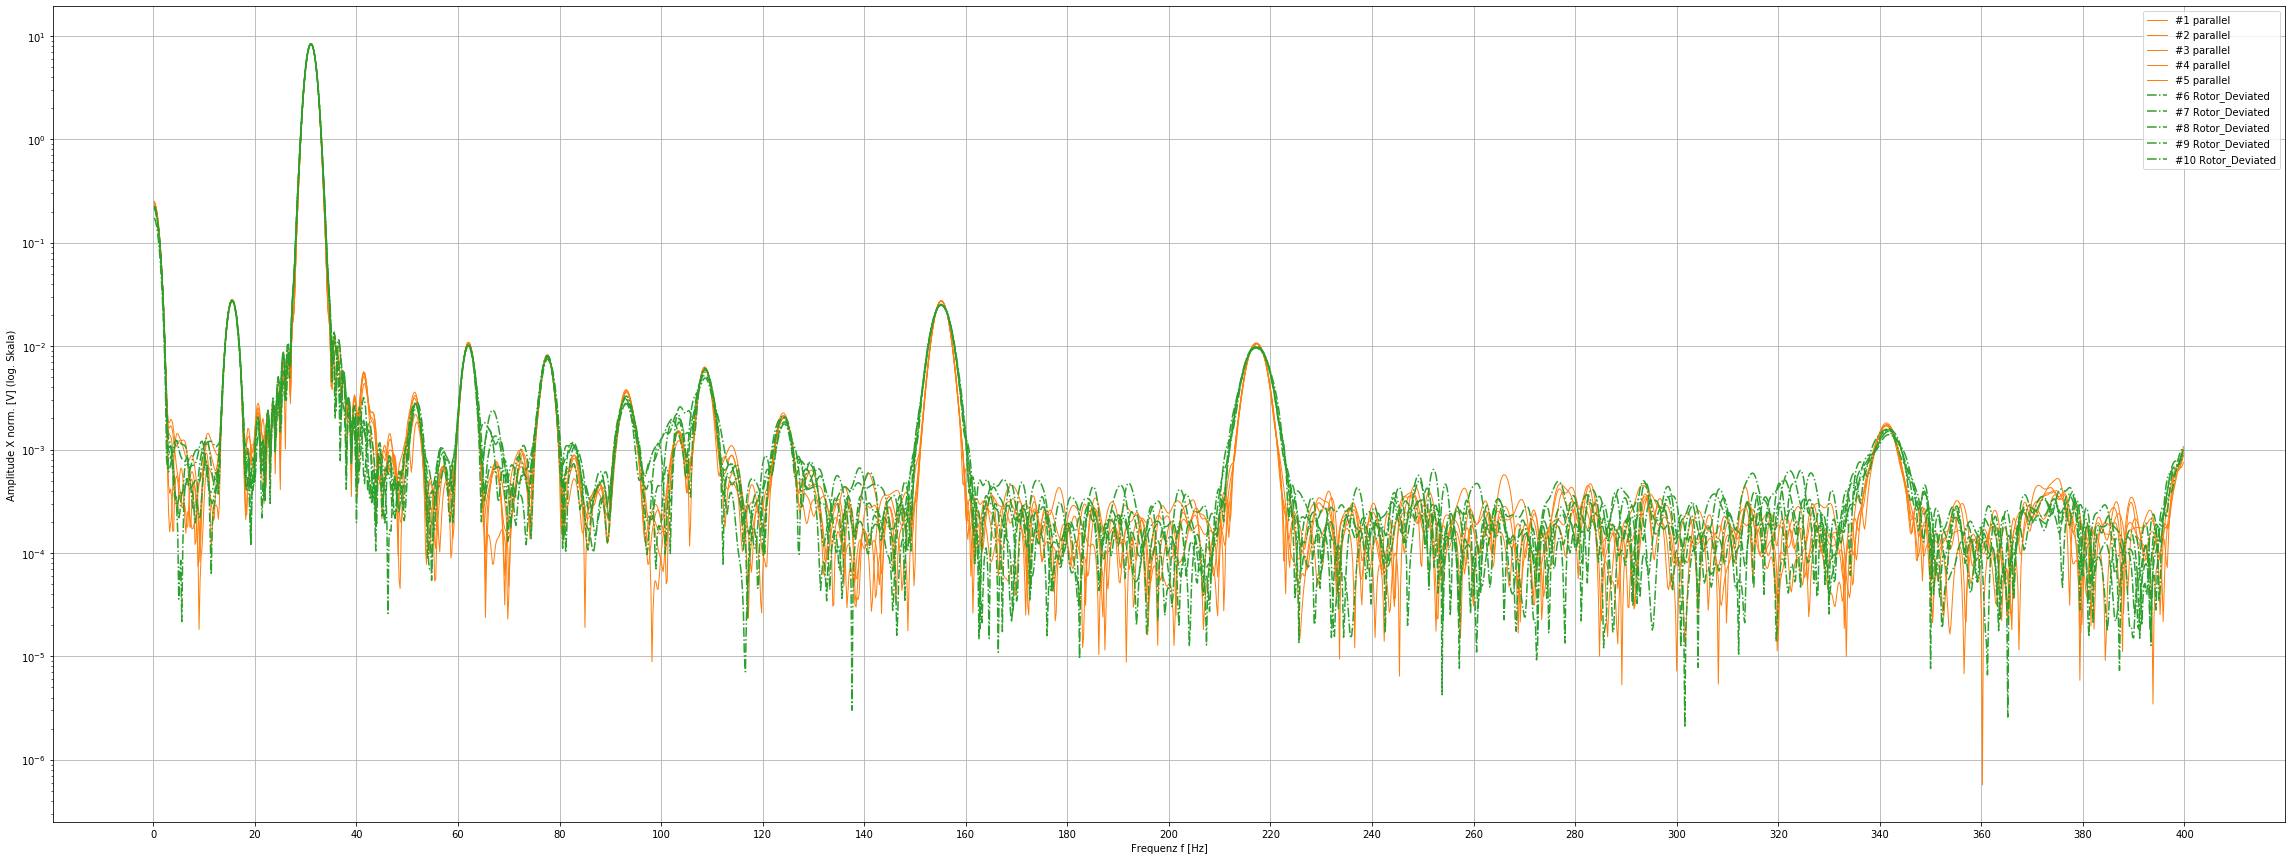

In [14]:
#plotfft2(spek,m=0,n=400,dtick=20,plot=0,figsize=(2*20,2*15),file="SpektrumUebersicht")
plotfft2(spek,m=0,n=400,dtick=20,plot=1,figsize=(2*20,1*15))

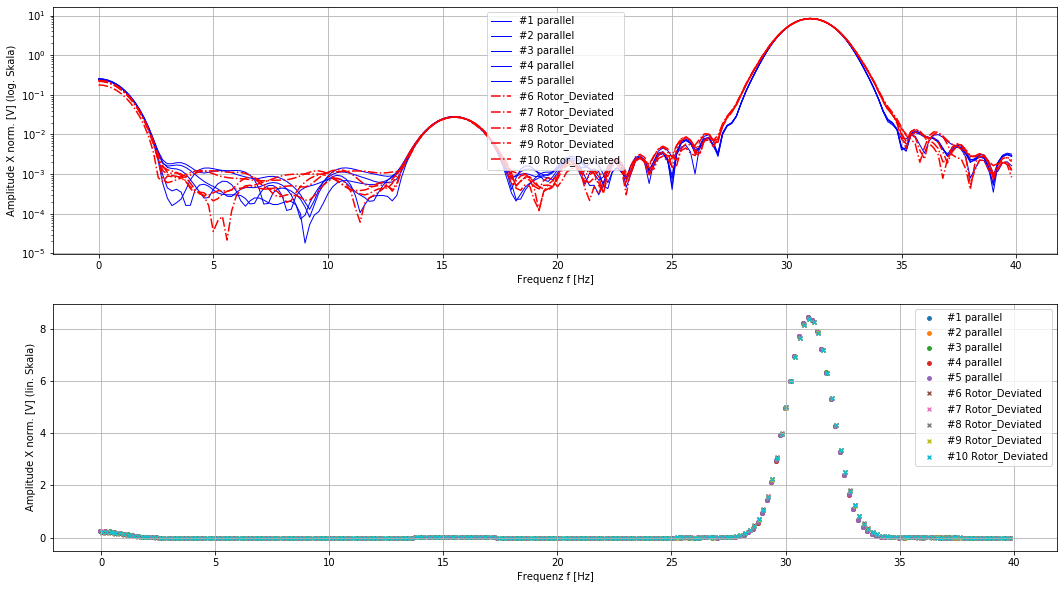

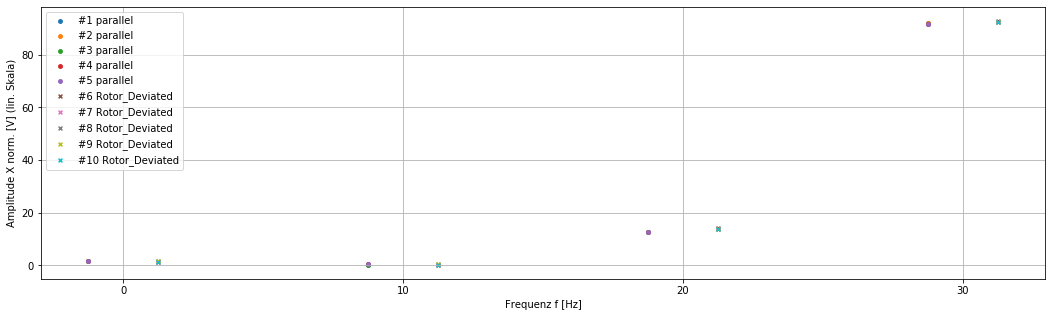

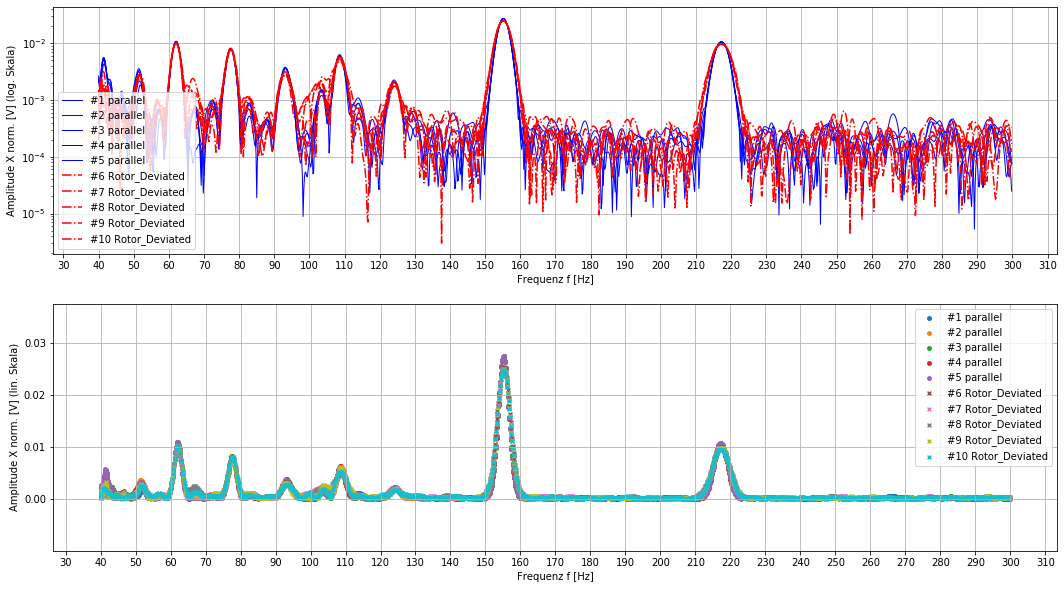

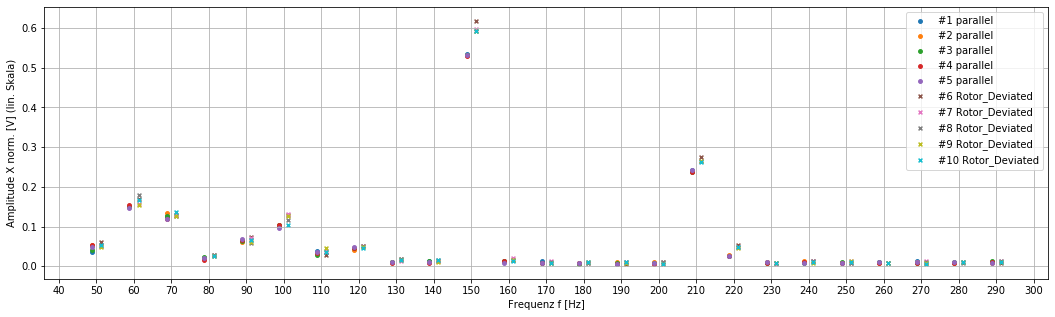

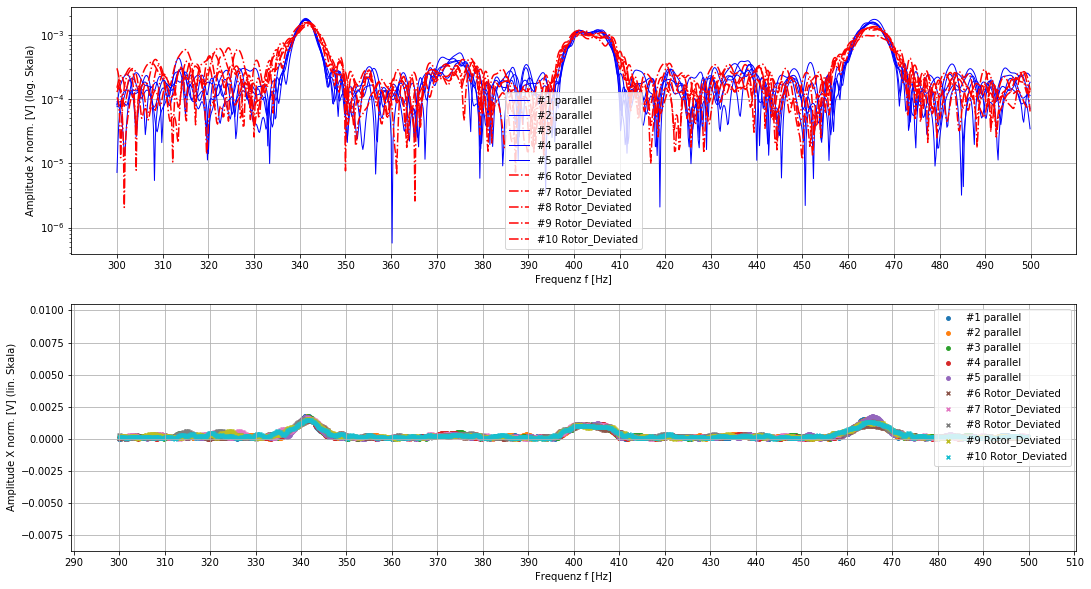

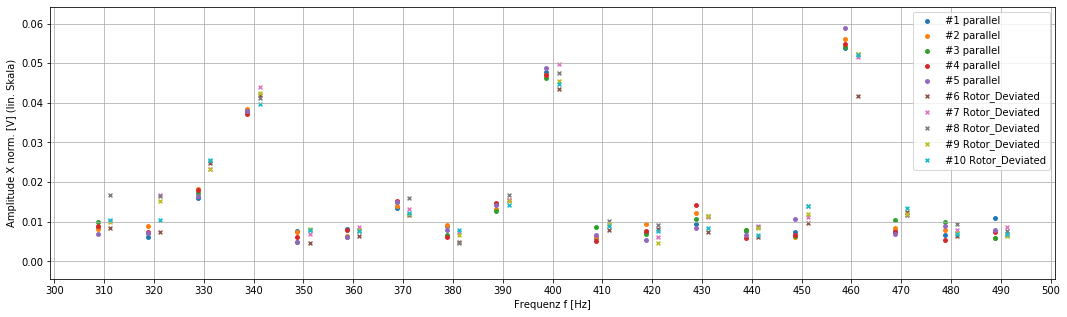

In [15]:
m=-1;n=40
plotfft2(spek,m=m,n=n,sp=15,dtick=5,kontrast=5,plot=0,figsize=(18,2*5))
plotfft2(df_b1,m=m,n=n,sp=15,dtick=10,plot=2,figsize=(18,5))
m=40;n=300
plotfft2(spek,m=m,n=n,sp=15,dtick=10,kontrast=5,plot=0,figsize=(18,2*5))
plotfft2(df_b1,m=m,n=n,sp=15,dtick=10,plot=2,figsize=(18,5))
m=300;n=500
plotfft2(spek,m=m,n=n,sp=15,dtick=10,kontrast=5,plot=0,figsize=(18,2*5))
plotfft2(df_b1,m=m,n=n,sp=15,dtick=10,plot=2,figsize=(18,5))

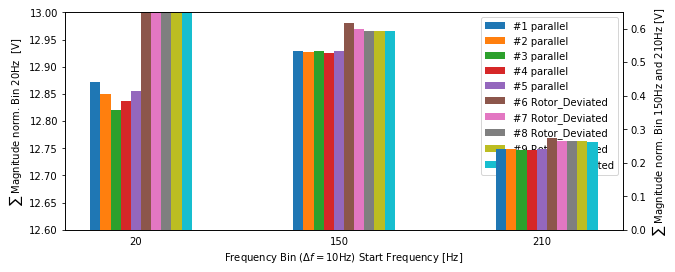

In [17]:
# Bar Chart for MA (alt)
fc_plot=[20,150,210]
fig, ax0 = plt.subplots(figsize = (10,4))
ax1=ax0.twinx()
df1=df_b1
width =0.05
x=np.arange(len(fc_plot))
for index, row in scope_dat.iterrows():
    for i in range(len(fc_plot)):
        data=df1.loc[df1['freq']==fc_plot[i],index].values[0]
        if(i==0): ax=ax0;c='Pastel1';#;print('go')
        else:     ax=ax1;c='green'
        #print(i,ax)
        t1='#'+str(index+1)+' '+row['Symbol']
        ax.bar(i+(index-4)*width, data, width=width,color='C'+str(index),label=t1)
ax0.set_ylim(12.6,13)
#ax1.grid(True)
#ax1.set_ylim(0,0.04)
for ax in [ax0,ax1]:
    ax0.set_xticks(x)
    ax0.set_xticklabels(fc_plot, rotation=0)
    ax0.xaxis.set_ticks_position('none') 
ax0.legend()
ax0.set_xlabel(r"Frequency Bin ($\Delta f=$"+str(round(bin_width))+"Hz) Start Frequency [Hz]")
ax0.set_ylabel(r"$\sum$ Magnitude norm. Bin "+str(fc_plot[0])+"Hz  [V]")
ax1.set_ylabel(r"$\sum$ Magnitude norm. Bin "+str(fc_plot[1])+"Hz and "+str(fc_plot[2])+"Hz [V]")
#plt.savefig("fc_Bins_plot.svg",qual=600)
plt.show()

In [18]:
155/(31/(2*p))

60.0

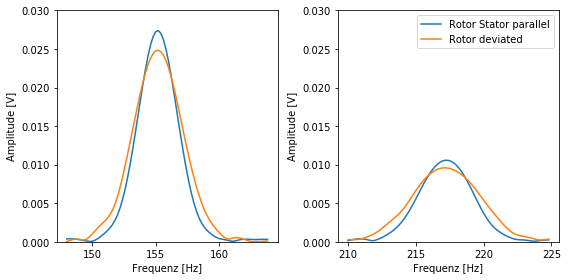

In [19]:
# Spektrum für MA
messung=[1,9]
fig, ax0 = plt.subplots(1,2,figsize = (8,4))
ax=ax0[0]
labels=['Rotor Stator parallel','Rotor deviated']
filter=(spek['freq']>148)&(spek['freq']<164)
for i in messung:
    ax.plot(spek.loc[filter,'freq'],spek.loc[filter,i])
    ax.set_ylim(0,0.03)
    ax.set_xlabel("Frequenz [Hz]")
ax=ax0[1]
filter=(spek['freq']>210)&(spek['freq']<225)
for i0,i in enumerate(messung):
    ax.plot(spek.loc[filter,'freq'],spek.loc[filter,i],label=labels[i0])
    #ax.plot(spek.loc[filter,'freq'],spek.loc[filter,i],label=(str(i)+' '+scope_dat.iloc[i]['Symbol']))
    ax.set_ylim(0,0.03)
    ax.set_xlabel("Frequenz [Hz]")
    ax.legend()
for ax in ax0:
    ax.set_ylabel("Amplitude [V]")
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
fig.tight_layout()
name="Spektrum5u7Oberwelle"
plt.savefig(name+".svg")
plt.show()